## Contents:
##### We have train data need to train a model to predict the chronic_flag based on it and predict the chronic flag on unseen test data
##### 1- Import libraries
##### 2- Reading train and test data
##### 3- EDA for all features on train by modifying data format summarize some categories..etc
##### 4- Feature Engineering add new features and drop others
##### 5- Check and Handling missing values
##### 6- Visualization of the relationships bewteen features
##### 7- Model Development
###### a- Split train into two parts to evluate the model 
###### b- Train, test and evluate different model and select the best
###### c- Hyperparmeter tunning of the best model
###### d- Train the model on all training data using the best param
###### e- Save the model to be used on inference
##### 8- Inference on test data
###### a- Prepare test data for prediction using the same approaches used in train
###### b- Load the model, predict and save the csv file

## 1- Import Libraries

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, f1_score, average_precision_score, precision_recall_curve, balanced_accuracy_score, roc_auc_score, matthews_corrcoef, classification_report, confusion_matrix
import shap

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date 


## 2- Read Data

In [4]:
# read the train dataset from data_set sheet
data = pd.read_excel("Data_DM.xlsx", sheet_name='Data_Set')
data.head()

,Unique_Identifier,Gender,Religion,Nationality,Avg_HBA1C Results,HBA1C test Compliance,D_Of_Birth,Diagnosis_Type,Chronic_flag,Acute_flag,...,Cancer,Cardio Vascular Disease,Perepheral Artery Disease,Renal Insufficiency,Heart Failure,Hypertension,Ischemic Heart Disease,Myocardial Infarction,Obesity,Stroke
0,SGH11015,Male,OTHER,PALASTINIAN,5.43875,Non Compliant,1974-01-01,Type II,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SGH11016,Male,OTHER,Saudi,6.186032,Compliant,1976-01-01,Type II,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SGH11017,Female,OTHER,Saudi,6.09918,Compliant,1955-01-01,Type II,0,0,...,0,0,0,0,0,1,0,0,0,0
3,SGH11018,Male,OTHER,Saudi,8.804544,Non Compliant,1974-01-01,Type II,0,0,...,0,0,0,0,0,1,0,0,0,0
4,SGH11019,Male,OTHER,Saudi,8.232722,Compliant,1954-01-01,Type II,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# read the test dataset from predict sheet
test = pd.read_excel("Data_DM.xlsx", sheet_name='Predict')
test.head()

,Unique_Identifier,Gender,Religion,Nationality,Avg_HBA1C Results,HBA1C test Compliance,D_Of_Birth,Diagnosis_Type,Acute_flag,ER_flag_bef_chronic,...,Cancer,Cardio Vascular Disease,Perepheral Artery Disease,Renal Insufficiency,Heart Failure,Hypertension,Ischemic Heart Disease,Myocardial Infarction,Obesity,Stroke
0,SGH22015,Female,OTHER,Saudi,Haven't performed Before,Non Compliant,1970-01-01,Type II,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SGH22016,Male,OTHER,Saudi,5.817996,Non Compliant,1975-01-01,Type II,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SGH22017,Female,OTHER,Saudi,9.792921,Non Compliant,1977-01-01,Type II,0,0,...,0,0,0,0,0,1,0,0,0,0
3,SGH22018,Male,OTHER,Saudi,Haven't performed Before,Non Compliant,1957-01-01,Type II,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SGH22019,Male,OTHER,Saudi,7.1,Non Compliant,1961-11-03,Type II,0,0,...,0,0,0,0,0,0,0,0,0,0


In [323]:
data.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic',
       '# ER_befor_Chr', 'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Cardio Vascular Disease', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke'],
      dtype='object')

In [324]:
test.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Acute_flag', 'ER_flag_bef_chronic', '# ER_befor_Chr',
       'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr', 'Comorbidity',
       'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease',
       'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure',
       'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction',
       'Obesity', 'Stroke'],
      dtype='object')

In [325]:
# ensure that all cols in train present in test except the target col "Chronic_flag"
for col in data.columns:
    if col not in test.columns:
        print(col)

Chronic_flag


## 3- Exploratory Data Analysis

In [7]:
# size of the data
data.shape

(12611, 27)

In [8]:
# explore the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12611 entries, 0 to 12610
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unique_Identifier          12611 non-null  object        
 1   Gender                     12611 non-null  object        
 2   Religion                   12611 non-null  object        
 3   Nationality                12611 non-null  object        
 4   Avg_HBA1C Results          12611 non-null  object        
 5   HBA1C test Compliance      12611 non-null  object        
 6   D_Of_Birth                 12611 non-null  datetime64[ns]
 7   Diagnosis_Type             12611 non-null  object        
 8   Chronic_flag               12611 non-null  int64         
 9   Acute_flag                 12611 non-null  int64         
 10  ER_flag_bef_chronic        12611 non-null  int64         
 11  # ER_befor_Chr             12611 non-null  int64         
 12  IP_f

#### Comments:
##### 1- No present of null values as all columns' non-null = no of rows in the data
##### 2- All columns have suitable data format

In [157]:
# see categorical feature
data.describe(include=["O"])

,Unique_Identifier,Gender,Religion,Nationality,Avg_HBA1C Results,HBA1C test Compliance,Diagnosis_Type
count,12611,12611,12611,12611,12611,12611,12611
unique,12611,2,22,170,4872,2,1
top,SGH11015,Male,Islam,Saudi,Haven't performed Before,Non Compliant,Type II
freq,1,6802,8115,7110,3411,9554,12611


### Comments:
#### No repeated patients as no repeated unique identifier 
#### 22 religion, 170 nationality need to be inspected
#### HBA1C results has non numerical values "Haven't performed Before" need to be checked and handled
#### all patients are Type II diabetic it is logic and provided

In [10]:
# see numerical feature
data.describe()

,Chronic_flag,Acute_flag,ER_flag_bef_chronic,# ER_befor_Chr,IP_flag_bef_chr,# IP_bef_chr,# OP_Bef_chr,Comorbidity,Atrial Fibrilation,Cancer,Cardio Vascular Disease,Perepheral Artery Disease,Renal Insufficiency,Heart Failure,Hypertension,Ischemic Heart Disease,Myocardial Infarction,Obesity,Stroke
count,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000,12611.000000
mean,0.284514,0.043296,0.013560,0.018555,0.008564,0.009833,0.423123,0.087622,0.003885,0.033304,0.000079,0.005392,0.012608,0.008802,0.395448,0.026485,0.003410,0.034652,0.006026
std,0.451200,0.203530,0.115658,0.191339,0.092148,0.111504,1.413490,0.323563,0.062215,0.179437,0.008905,0.073236,0.111580,0.093408,0.488966,0.160578,0.058295,0.182905,0.077399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,9.000000,1.000000,3.000000,21.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Comments:
#### Comorbidity max value =6 although it should be zero or one need to be checked

#### a- Religion/Nationality columns

In [11]:
data["Religion"].value_counts()

Islam                             8115
OTHER                             2185
ISLAM                             1100
JEWISH                             668
Unknown                            337
Others                              86
MUSLIM                              60
Christian                           27
Unknown/Not Known                    7
Not Specified                        6
Catholic                             3
CHRISTIAN                            3
United Church of Christ in Phi       2
Uniting Church                       2
HINDU                                2
No Religion                          2
Jehovas Witness                      1
BUDDHIST                             1
Orthodox                             1
Methodist                            1
Greek Orthodox                       1
Hindu                                1
Name: Religion, dtype: int64

In [6]:
# Replace some values in the Religion columns to be unified
data["Religion"].replace(["ISLAM", "MUSLIM", "Islam"], "Muslim", inplace=True)
data["Religion"].replace(["Catholic", "CHRISTIAN", "United Church of Christ in Phi", "Uniting Church", "Orthodox", "Methodist", "Greek Orthodox", "Jehovas Witness"], "Christian", inplace=True)
data["Religion"].replace(["HINDU"], "Hindu", inplace=True)
data["Religion"].replace(["OTHER"], "Others", inplace=True)
data["Religion"].replace(["Not Specified", "Unknown/Not Known"], "Unknown", inplace=True)
data["Religion"].replace(["JEWISH"], "Jewish", inplace=True)

data["Religion"].value_counts()

Muslim         9275
Others         2271
Jewish          668
Unknown         350
Christian        41
Hindu             3
No Religion       2
BUDDHIST          1
Name: Religion, dtype: int64

In [159]:
data["Nationality"].value_counts()

Saudi             7110
SAUDI             1796
Egyptian           669
EGYPTIAN           506
Pakistani          181
                  ... 
Cameroonian          1
AMERICAN SAMOA       1
IRELAND              1
PHILIPPINES          1
Belgian              1
Name: Nationality, Length: 170, dtype: int64

In [160]:
# first convert all to lowercase
data["Nationality"].str.lower().value_counts()

saudi           8906
egyptian        1175
pakistani        287
indian           234
yemeni           224
                ... 
sierra leone       1
kuwait             1
palauan            1
austrian           1
belgian            1
Name: Nationality, Length: 132, dtype: int64

In [7]:
# user lowercase nationality to combine similar nations
data["Nationality2"] = data["Nationality"].str.lower()
data["Nationality2"].value_counts()

saudi           8906
egyptian        1175
pakistani        287
indian           234
yemeni           224
                ... 
sierra leone       1
kuwait             1
palauan            1
austrian           1
belgian            1
Name: Nationality2, Length: 132, dtype: int64

In [328]:
data["Nationality2"].unique()

array(['palastinian', 'saudi', 'indian', 'egyptian', 'sudanese',
       'pakistani', 'american', 'other', 'bangladishi', 'philippine',
       'palestinian', 'yemen', 'tunisian', 'phillipino', 'jordon',
       'syrian', 'yemeni', 'erytrian', 'bangladeshi', 'african',
       'lebanese', 'dutch', 'lebanon (lebanese)', 'not in use', 'turkish',
       'french', 'andorran', 'sierra leonean', 'jordanian',
       'do not use sudani', 'afghan', 'albanian', 'somali',
       'north korean', 'samoan', 'filipino', 'kenyan', 'arabian', 'kenya',
       'bahamian', 'sudan', 'nepalese', 'nepali', 'ugandan',
       'afghanistan', 'qatari', 'palestine', 'belarusian', 'ethiopia',
       'saudi foreign passport', 'chadian', 'british', '-', 'eritrean',
       'nigerian', 'sri lankan', 'finnish', 'moroccan', 'kuwaiti',
       'indonesia', 'niger', 'myanmar', 'mauritian', 'alniger',
       'ethiopian', 'algerian', 'mauritanian', 'saudi arabia', 'lebanen',
       'malian', 'canadian', 'malaysian', 'lankan', 'z

In [8]:
# rename some nations that used in different words
data["Nationality2"].replace(["-", "not in use"], "NAN", inplace=True)
data["Nationality2"].replace(["do not use sudani"], "sudan", inplace=True)
data["Nationality2"].replace(["phillipino", "philippine", "filipino"], "philip", inplace=True)
data["Nationality2"].replace(['erytrian', 'ethiopia', 'eritrean'], "ethiopia", inplace=True)
data["Nationality2"].replace(['north yemeni', 'yemeni'], 'yemen', inplace=True)
data["Nationality2"].replace(["dutch", "germany"], "german", inplace=True)
data["Nationality2"].replace(["ireland", "irish"], "irish", inplace=True)
data["Nationality2"].replace(['finnish', 'finland'], "finnish", inplace=True)
data["Nationality2"].replace(['west indian'], "indian", inplace=True)

data["Nationality2"].unique()

array(['palastinian', 'saudi', 'indian', 'egyptian', 'sudanese',
       'pakistani', 'american', 'other', 'bangladishi', 'philip',
       'palestinian', 'yemen', 'tunisian', 'jordon', 'syrian', 'ethiopia',
       'bangladeshi', 'african', 'lebanese', 'german',
       'lebanon (lebanese)', 'NAN', 'turkish', 'french', 'andorran',
       'sierra leonean', 'jordanian', 'sudan', 'afghan', 'albanian',
       'somali', 'north korean', 'samoan', 'kenyan', 'arabian', 'kenya',
       'bahamian', 'nepalese', 'nepali', 'ugandan', 'afghanistan',
       'qatari', 'palestine', 'belarusian', 'saudi foreign passport',
       'chadian', 'british', 'nigerian', 'sri lankan', 'finnish',
       'moroccan', 'kuwaiti', 'indonesia', 'niger', 'myanmar',
       'mauritian', 'alniger', 'ethiopian', 'algerian', 'mauritanian',
       'saudi arabia', 'lebanen', 'malian', 'canadian', 'malaysian',
       'lankan', 'zambian', 'south african', 'spanish', 'philippines',
       'irish', 'indonesian', 'american samoa', 'su

In [9]:
# check nations with lower numbers 
data["Nationality2"].value_counts()[data["Nationality2"].value_counts()<10].index

Index(['canadian', 'NAN', 'turkish', 'bangladishi', 'spanish', 'jordon',
       'chadian', 'afghanistan', 'french', 'nepali', 'ethiopian', 'mauritian',
       'mauritanian', 'arabian', 'german', 'turki', 'iraqi', 'chad',
       'djiboutian', 'malaysian', 'albanian', 'lebanon (lebanese)', 'algerian',
       'senegalese', 'somalia', 'african', 'brazil', 'new zealand',
       'australian', 'kuwaiti', 'kenya', 'finnish', 'irish', 'qatari',
       'burmese', 'malaysia', 'indionisa', 'indonesia', 'libyan', 'surinamese',
       'martinican', 'chinese', 'emirati', 'senegal', 'nepalese', 'kenyan',
       'taiwanese', 'italy', 'gambian', 'angolan', 'ghanaian', 'swedish',
       'mauritania', 'azerbaijani', 'barbadian', 'svalbard and jan mayen',
       'algeria', 'maldivian', 'romania', 'australia', 'greec', 'fijian',
       'bahraini', 'belarusian', 'omani', 'turky', 'portuguese', 'ugandan',
       'bahamian', 'niger', 'myanmar', 'alniger', 'samoan', 'north korean',
       'saudi arabia', 'malia

In [10]:
# combine with another way by using the first 4 letters only
data["Nationality2"] = data["Nationality2"].apply(lambda x: x[:4])
data["Nationality2"].value_counts()

saud    8963
egyp    1175
yeme     411
paki     287
indi     246
        ... 
mali       1
lank       1
came       1
zamb       1
belg       1
Name: Nationality2, Length: 86, dtype: int64

In [11]:
data["Nationality2"].value_counts()[data["Nationality2"].value_counts()<10].index

Index(['cana', 'nepa', 'NAN', 'span', 'mala', 'fren', 'germ', 'keny', 'arab',
       'sene', 'aust', 'djib', 'iraq', 'alge', 'alba', 'kuwa', 'braz', 'new ',
       'afri', 'finn', 'mart', 'liby', 'taiw', 'ital', 'burm', 'chin', 'emir',
       'suri', 'sier', 'qata', 'iris', 'nort', 'roma', 'swed', 'barb', 'mald',
       'samo', 'fiji', 'bahr', 'azer', 'sval', 'baha', 'gree', 'ugan', 'ango',
       'gamb', 'ghan', 'port', 'bela', 'ando', 'myan', 'alni', 'oman', 'mali',
       'lank', 'came', 'zamb', 'belg'],
      dtype='object')

In [12]:
# combine nations with lower number than 10 using their contents with almost the same habitat and traditions
data["Nationality2"].replace(['arab','iraq','alge', 'kuwa', 'liby', 'qata', 'emir', 'bahr', 'oman',], "oarab", inplace=True)
data["Nationality2"].replace(['sene', 'afri','keny','ghan', 'ango', 'gamb','ugan', 'alni', 'mali', 'zamb', 'came'], "oafric", inplace=True)
data["Nationality2"].replace(['cana', 'span','fren', 'aust','alba', 'braz', 'germ', 'gree',
       'finn', 'ital', 'swed', 'iris', 'sval', 'azer', 'roma', 'port', 'finl', 'irel', 'belg'], "oeuro", inplace=True)
data["Nationality2"].replace(['nepa', 'mala', 'djib', 'new ', 'chin', 'mart', 'burm', 'taiw',
       'suri', 'sier', 'fiji', 'mald', 'samo', 'lank', 'myan', 'bela', 'baha',
       'nort', 'ando', 'barb'], "oasia", inplace=True)

In [13]:
data["Nationality2"].value_counts()[data["Nationality2"].value_counts()<10].index

Index(['NAN'], dtype='object')

In [14]:
data["Nationality2"].value_counts()

saud      8963
egyp      1175
yeme       411
paki       287
indi       246
suda       184
jord       163
syri       142
phil       130
bang       123
othe       123
nige       107
pale        85
leba        78
oeuro       53
oasia       43
ethi        29
oarab       25
amer        24
moro        22
oafric      21
pala        20
afgh        19
brit        19
soma        18
sri         18
tuni        17
turk        13
indo        12
sout        12
maur        11
chad        10
NAN          8
Name: Nationality2, dtype: int64

In [15]:
# replace Not known nationality with null values
data["Nationality2"].replace("NAN", np.NaN, inplace= True)

In [16]:
data.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic',
       '# ER_befor_Chr', 'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Cardio Vascular Disease', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality2'],
      dtype='object')

In [17]:
data["Avg_HBA1C Results"].value_counts()

Haven't performed Before    3411
5.2                          155
5.3                          148
5.4                          143
5.5                          136
                            ... 
5.33312585998468               1
6.84908745265595               1
5.49590451873403               1
5.71916888285741               1
7.56204530198799               1
Name: Avg_HBA1C Results, Length: 4872, dtype: int64

In [18]:
# date of birth
data["D_Of_Birth"]

0       1974-01-01
1       1976-01-01
2       1955-01-01
3       1974-01-01
4       1954-01-01
           ...    
12606   1967-04-17
12607   1974-07-20
12608   1962-11-28
12609   1984-09-29
12610   1966-01-02
Name: D_Of_Birth, Length: 12611, dtype: datetime64[ns]

In [19]:
# Convert date of birth to age
today = today = pd.Timestamp.today()
data["Age"] = data['D_Of_Birth'].apply(lambda x: round((today - x).days / 365.25, 2))  # Divide by 365.25 to account for leap years
data["Age"]

0        51.12
1        49.13
2        70.12
3        51.12
4        71.12
         ...  
12606    57.83
12607    50.58
12608    62.22
12609    40.38
12610    59.12
Name: Age, Length: 12611, dtype: float64

In [20]:
# check max and min age
print(data["Age"].max(), data["Age"].min())

125.12 0.87


<Axes: xlabel='Age', ylabel='Count'>

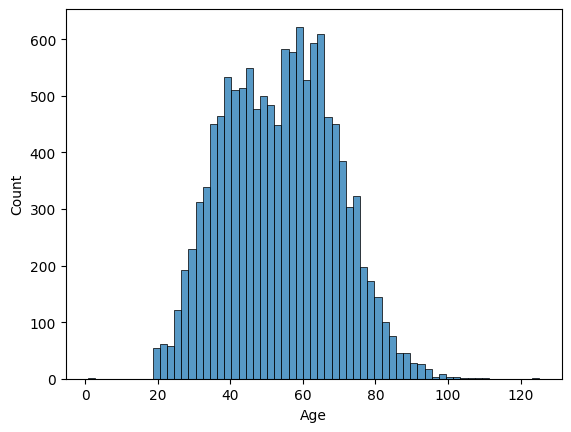

In [177]:
sns.histplot(data=data, x="Age")


<Axes: ylabel='Age'>

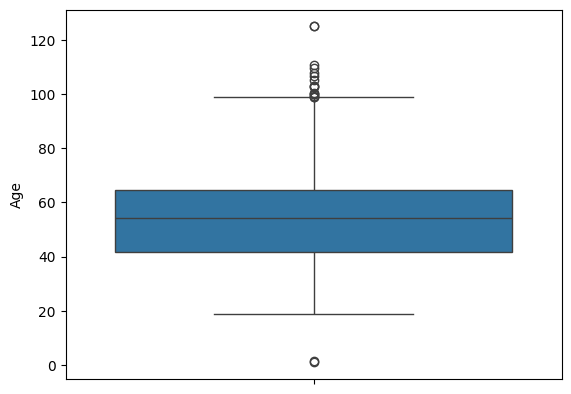

In [30]:
sns.boxplot(data=data, y="Age")


In [178]:
Q3 = np.quantile(data["Age"], 0.75)
Q1 = np.quantile(data["Age"], 0.25)
IQR = Q3 - Q1
 
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

print("lower rage value for Age is: ", lower_range)
print("upper rage value for Age is: ", upper_range)


lower rage value for Age is:  7.167499999999997
upper rage value for Age is:  99.10749999999999


In [179]:
print(len(data[data["Age"]>100]))
print(len(data[data["Age"]<2])) 

13
2


In [21]:
# replace Haven't performed Before with null
data["Avg_HBA1C Results"].replace("Haven't performed Before", np.NaN, inplace=True)

<Axes: xlabel='Avg_HBA1C Results', ylabel='Count'>

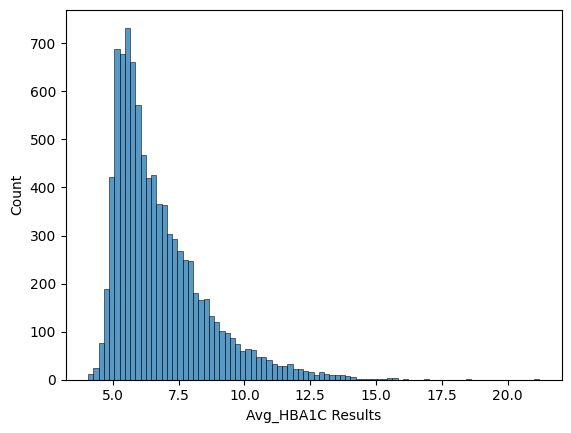

In [181]:
sns.histplot(data=data, x="Avg_HBA1C Results")


<Axes: ylabel='Avg_HBA1C Results'>

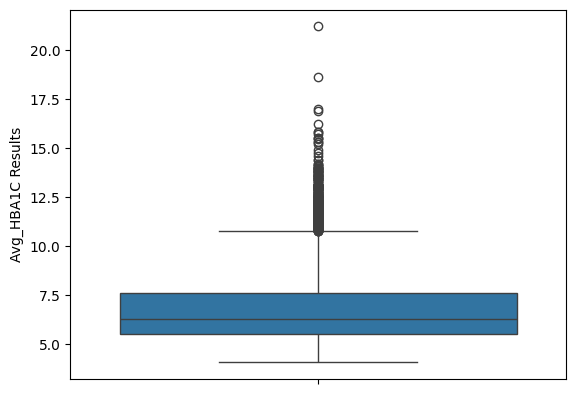

In [182]:
sns.boxplot(data=data, y="Avg_HBA1C Results")


In [79]:
Q3 = np.nanquantile(data["Avg_HBA1C Results"], 0.75)
Q1 = np.nanquantile(data["Avg_HBA1C Results"], 0.25)
IQR = Q3 - Q1
 
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

print("lower rage value for Avg_HBA1C Results is: ", lower_range)
print("upper rage value for Avg_HBA1C Results is: ", upper_range)


lower rage value for Avg_HBA1C Results is:  2.350000000000015
upper rage value for Avg_HBA1C Results is:  10.749999999999975


### Comments:
#### is it logic to have HBA1c value > 15???

In [22]:
data[data["Avg_HBA1C Results"]>15]["HBA1C test Compliance"].value_counts() # some were compliant and other werent 

Compliant        8
Non Compliant    6
Name: HBA1C test Compliance, dtype: int64

In [52]:
# check values of comorbidty 
data['Comorbidity'].value_counts()

0    11628
1      885
2       81
3       12
4        4
6        1
Name: Comorbidity, dtype: int64

#### There are values > 1 although it should be zero or one as stated in the instruction file

In [53]:
# replace values > 1 with null as we dont know actual values mostly it is typing error
data["Comorbidity"].replace([2, 3, 4, 6], np.NaN, inplace=True)
data['Comorbidity'].value_counts()

0.0    11628
1.0      885
Name: Comorbidity, dtype: int64

In [186]:
data.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic',
       '# ER_befor_Chr', 'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Cardio Vascular Disease', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality2', 'Age'],
      dtype='object')

#### Check content of other columns

In [187]:
data['Gender'].value_counts()

Male      6802
Female    5809
Name: Gender, dtype: int64

In [188]:
data['HBA1C test Compliance'].value_counts()

Non Compliant    9554
Compliant        3057
Name: HBA1C test Compliance, dtype: int64

In [189]:
data['Chronic_flag'].value_counts()

0    9023
1    3588
Name: Chronic_flag, dtype: int64

In [190]:
data['Acute_flag'].value_counts()

0    12065
1      546
Name: Acute_flag, dtype: int64

In [191]:
data['ER_flag_bef_chronic'].value_counts()

0    12440
1      171
Name: ER_flag_bef_chronic, dtype: int64

In [192]:
data['# ER_befor_Chr'].value_counts()

0    12440
1      132
2       26
3        9
4        2
6        1
9        1
Name: # ER_befor_Chr, dtype: int64

<Axes: xlabel='# ER_befor_Chr', ylabel='Count'>

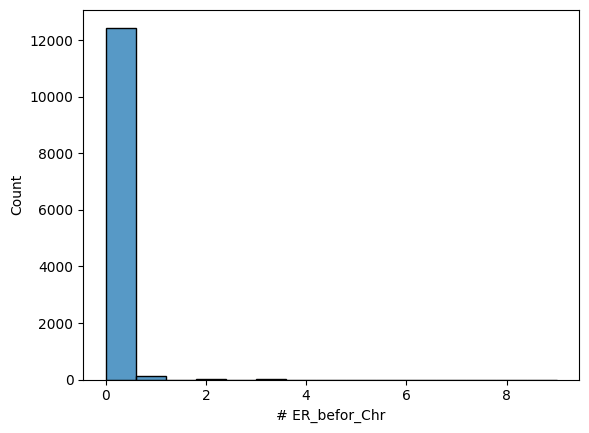

In [193]:
sns.histplot(data=data, x='# ER_befor_Chr')


In [194]:
data['IP_flag_bef_chr'].value_counts()

0    12503
1      108
Name: IP_flag_bef_chr, dtype: int64

In [195]:
data['# IP_bef_chr'].value_counts()

0    12503
1       93
2       14
3        1
Name: # IP_bef_chr, dtype: int64

In [49]:
data['# OP_Bef_chr'].value_counts()

0     10763
1       732
2       366
3       241
4       162
5       108
6        70
7        56
8        40
10       24
9        18
11        7
13        6
12        6
15        3
17        2
14        2
19        2
21        1
16        1
18        1
Name: # OP_Bef_chr, dtype: int64

<Axes: xlabel='# OP_Bef_chr', ylabel='Count'>

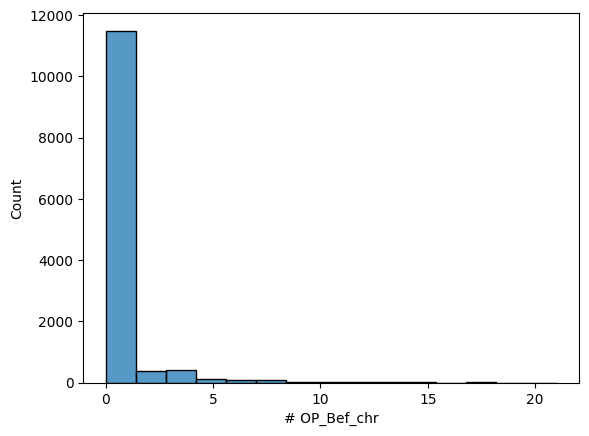

In [50]:
sns.histplot(data=data, x='# OP_Bef_chr')


In [197]:
data['Diagnosis_Type'].value_counts() # it is a redudant will confuse the model has one value across the data

Type II    12611
Name: Diagnosis_Type, dtype: int64

In [198]:
cat_feat = ['Atrial Fibrilation', 'Cancer',
       'Cardio Vascular Disease', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke']

for feat in cat_feat:
    print("Feature Name: ", feat)
    print(data[feat].value_counts())

Feature Name:  Atrial Fibrilation
0    12562
1       49
Name: Atrial Fibrilation, dtype: int64
Feature Name:  Cancer
0    12191
1      420
Name: Cancer, dtype: int64
Feature Name:  Cardio Vascular Disease
0    12610
1        1
Name: Cardio Vascular Disease, dtype: int64
Feature Name:  Perepheral Artery Disease
0    12543
1       68
Name: Perepheral Artery Disease, dtype: int64
Feature Name:  Renal Insufficiency
0    12452
1      159
Name: Renal Insufficiency, dtype: int64
Feature Name:  Heart Failure
0    12500
1      111
Name: Heart Failure, dtype: int64
Feature Name:  Hypertension
0    7624
1    4987
Name: Hypertension, dtype: int64
Feature Name:  Ischemic Heart Disease
0    12277
1      334
Name: Ischemic Heart Disease, dtype: int64
Feature Name:  Myocardial Infarction
0    12568
1       43
Name: Myocardial Infarction, dtype: int64
Feature Name:  Obesity
0    12174
1      437
Name: Obesity, dtype: int64
Feature Name:  Stroke
0    12535
1       76
Name: Stroke, dtype: int64


#### There is only one patient with Cardio Vascular Disease all other patients with no cardio vascular disease
#### so, It is a redundant feature 

### 4- Feature Engineering

In [53]:
data.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic',
       '# ER_befor_Chr', 'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Cardio Vascular Disease', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality2', 'Age'],
      dtype='object')

In [231]:
data2 = data.copy()

In [232]:
# Multiply the columns ER_flag_bef_chronic with # ER_befor_Chr into one column 
# Multiply the columns ER_flag_bef_chronic with # ER_befor_Chr into one column 
# to ensure there is no conflict between the two features that provide the same info whether he visited and number of vistis 

data2["ERV_before"] = data2["ER_flag_bef_chronic"]*data2["# ER_befor_Chr"]
data2["IP_before"] = data2["IP_flag_bef_chr"]*data2["# IP_bef_chr"]
data2["ERV_before"].value_counts()

0    12440
1      132
2       26
3        9
4        2
6        1
9        1
Name: ERV_before, dtype: int64

In [26]:
data2.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic',
       '# ER_befor_Chr', 'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Cardio Vascular Disease', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality2', 'Age', 'ERV_before', 'IP_before'],
      dtype='object')

In [91]:
data2.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic',
       '# ER_befor_Chr', 'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Cardio Vascular Disease', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality2', 'Age', 'ERV_before', 'IP_before', 'OP_cat'],
      dtype='object')

In [113]:
data[["Nationality", "Nationality2"]]

,Nationality,Nationality2
0,PALASTINIAN,pala
1,Saudi,saud
2,Saudi,saud
3,Saudi,saud
4,Saudi,saud
...,...,...
12606,Nigerian,nige
12607,Saudi,saud
12608,Saudi,saud
12609,Saudi,saud


In [233]:
# save the nationality modifications we have made above to be converted in the test data only
nation_dict = data[["Nationality", "Nationality2"]].set_index('Nationality')['Nationality2'].to_dict()
nation_dict

{'PALASTINIAN': 'pala',
 'Saudi': 'saud',
 'INDIAN': 'indi',
 'EGYPTIAN': 'egyp',
 'SUDANESE': 'suda',
 'PAKISTANI': 'paki',
 'AMERICAN': 'amer',
 'OTHER': 'othe',
 'BANGLADISHI': 'bang',
 'Philippine': 'phil',
 'Palestinian': 'pale',
 'YEMEN': 'yeme',
 'TUNISIAN': 'tuni',
 'PHILLIPINO': 'phil',
 'JORDON': 'jord',
 'SYRIAN': 'syri',
 'Yemeni': 'yeme',
 'ERYTRIAN': 'ethi',
 'Bangladeshi': 'bang',
 'AFRICAN': 'oafric',
 'Lebanese': 'leba',
 'DUTCH': 'oeuro',
 'LEBANON (Lebanese)': 'leba',
 'Not in use': nan,
 'Turkish': 'turk',
 'FRENCH': 'oeuro',
 'Andorran': 'oasia',
 'Sierra Leonean': 'oasia',
 'Jordanian': 'jord',
 'Do Not Use Sudani': 'suda',
 'Afghan': 'afgh',
 'ALBANIAN': 'oeuro',
 'Somali': 'soma',
 'North Korean': 'oasia',
 'Samoan': 'oasia',
 'Egyptian': 'egyp',
 'Filipino': 'phil',
 'Other': 'othe',
 'Kenyan': 'oafric',
 'Arabian': 'oarab',
 'Kenya': 'oafric',
 'Yemen': 'yeme',
 'Indian': 'indi',
 'Pakistani': 'paki',
 'BAHAMIAN': 'oasia',
 'Sudan': 'suda',
 'Sudanese': 'suda'

In [115]:
data2.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic',
       '# ER_befor_Chr', 'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Cardio Vascular Disease', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality2', 'Age', 'ERV_before', 'IP_before'],
      dtype='object')

In [234]:
# Drop redundant features including Diagnosis_Type as all patient are type2 so it is a redudant
# and drop also the cardio vascular disease feature as it has 0 values in all enteries except one
data2.drop(["Diagnosis_Type", 'Cardio Vascular Disease', 'Nationality', 'D_Of_Birth', '# ER_befor_Chr', 'IP_flag_bef_chr',
       '# IP_bef_chr'], axis=1, inplace=True)
data2.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Avg_HBA1C Results',
       'HBA1C test Compliance', 'Chronic_flag', 'Acute_flag',
       'ER_flag_bef_chronic', '# OP_Bef_chr', 'Comorbidity',
       'Atrial Fibrilation', 'Cancer', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality2', 'Age', 'ERV_before', 'IP_before'],
      dtype='object')

In [235]:
# Use unique identifier as the index 
data2.set_index("Unique_Identifier", inplace=True)
data2.head()

,Gender,Religion,Avg_HBA1C Results,HBA1C test Compliance,Chronic_flag,Acute_flag,ER_flag_bef_chronic,# OP_Bef_chr,Comorbidity,Atrial Fibrilation,...,Heart Failure,Hypertension,Ischemic Heart Disease,Myocardial Infarction,Obesity,Stroke,Nationality2,Age,ERV_before,IP_before
Unique_Identifier,,,,,,,,,,,,,,,,,,,,,
SGH11015,Male,Others,5.438750,Non Compliant,0,0,0,0,0.0,0,...,0,0,0,0,0,0,pala,51.12,0,0
SGH11016,Male,Others,6.186032,Compliant,0,0,0,0,0.0,0,...,0,0,0,0,0,0,saud,49.13,0,0
SGH11017,Female,Others,6.099180,Compliant,0,0,0,0,0.0,0,...,0,1,0,0,0,0,saud,70.12,0,0
SGH11018,Male,Others,8.804544,Non Compliant,0,0,0,0,0.0,0,...,0,1,0,0,0,0,saud,51.12,0,0
SGH11019,Male,Others,8.232722,Compliant,0,0,0,0,0.0,0,...,0,0,0,0,0,0,saud,71.12,0,0


### 5- Handling missing values

In [130]:
data3.isnull().sum()

Gender                          0
Religion                        0
Avg_HBA1C Results            3411
HBA1C test Compliance           0
Chronic_flag                    0
Acute_flag                      0
ER_flag_bef_chronic             0
Comorbidity                    98
Atrial Fibrilation              0
Cancer                          0
Perepheral Artery Disease       0
Renal Insufficiency             0
Heart Failure                   0
Hypertension                    0
Ischemic Heart Disease          0
Myocardial Infarction           0
Obesity                         0
Stroke                          0
Nationality2                    8
Age                             0
ERV_before                      0
IP_before                       0
dtype: int64

In [131]:
miss_rate = data3.isnull().sum()/data2.shape[0]*100
miss_rate

Gender                        0.000000
Religion                      0.000000
Avg_HBA1C Results            27.047815
HBA1C test Compliance         0.000000
Chronic_flag                  0.000000
Acute_flag                    0.000000
ER_flag_bef_chronic           0.000000
Comorbidity                   0.777099
Atrial Fibrilation            0.000000
Cancer                        0.000000
Perepheral Artery Disease     0.000000
Renal Insufficiency           0.000000
Heart Failure                 0.000000
Hypertension                  0.000000
Ischemic Heart Disease        0.000000
Myocardial Infarction         0.000000
Obesity                       0.000000
Stroke                        0.000000
Nationality2                  0.063437
Age                           0.000000
ERV_before                    0.000000
IP_before                     0.000000
dtype: float64

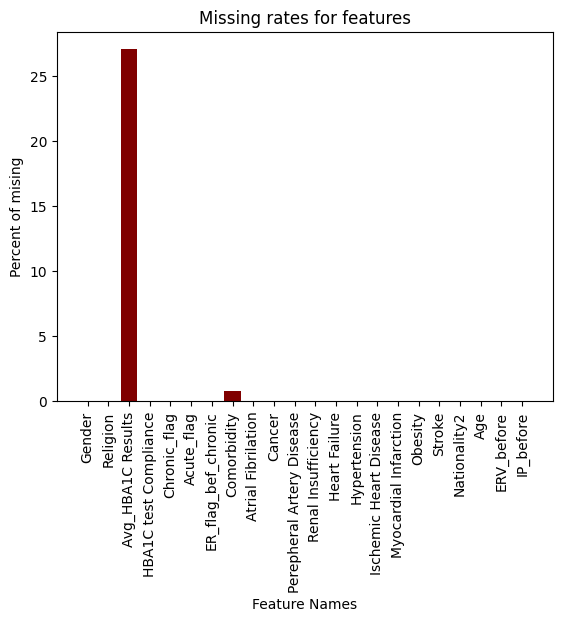

In [132]:
columns = list(miss_rate.index)
rate = list(miss_rate.values)
 
# creating the bar plot
plt.bar(columns, rate, color ='maroon' )
plt.xticks(rotation=90)

plt.xlabel("Feature Names")
plt.ylabel("Percent of mising")
plt.title("Missing rates for features")
plt.show()

#### Comments:
#### I think to drop rows with null values in the Hba1c average results becaue it has more than 25% nulls
#### But we should see if it is the actual scenario to have missing in these feature if so, we have to replace them
#### I will check that for Comorbidity feature also

In [133]:
test["Avg_HBA1C Results"].value_counts()

Haven't performed Before    1723
5.5                           80
5.3                           73
5.7                           73
5.4                           71
                            ... 
6.47996913572896               1
6.71495346223635               1
7.31                           1
7.15807236621703               1
12.0735247546025               1
Name: Avg_HBA1C Results, Length: 1401, dtype: int64

#### Test data has missing in this feature so, we have to replace missing in the train data before prediction

In [70]:
test["Comorbidity"].value_counts()

0    4570
1     408
2      33
3      10
5       1
Name: Comorbidity, dtype: int64

In [71]:
test["Nationality"].str.lower().value_counts()

saudi           3557
egyptian         409
yemeni           111
pakistani        110
indian           100
                ... 
gambian            1
brazil             1
beninese           1
curacaoan          1
south korean       1
Name: Nationality, Length: 103, dtype: int64

##### The same happens for other features which have miss values so we will keep them and  make replacement 
#### We will replace null values in `Avg_HBA1C Results` with median of this column as it have very high values ~20
#### We will replace null in  `Nationality`  and  `Comorbidity` with the most frequent values
#### Replacement of missing values will be done after splitting the data into train and test to avoid data leakage

In [182]:
data.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic',
       '# ER_befor_Chr', 'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Cardio Vascular Disease', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality2', 'Age'],
      dtype='object')

### 6- Visualization of relationships between features and Chronic_flag

<Axes: xlabel='Chronic_flag', ylabel='Avg_HBA1C Results'>

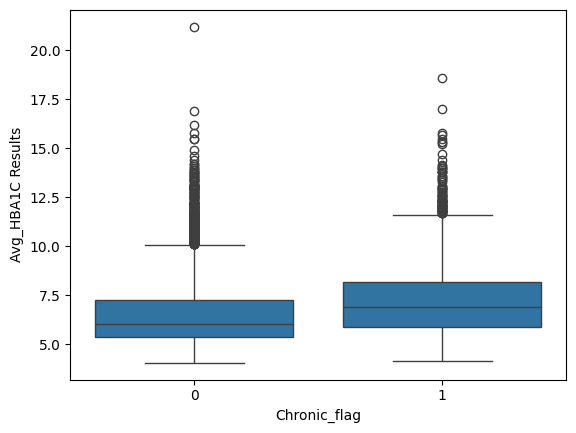

In [184]:
sns.boxplot(x='Chronic_flag', y='Avg_HBA1C Results', data=data) 

<Axes: xlabel='Chronic_flag', ylabel='Age'>

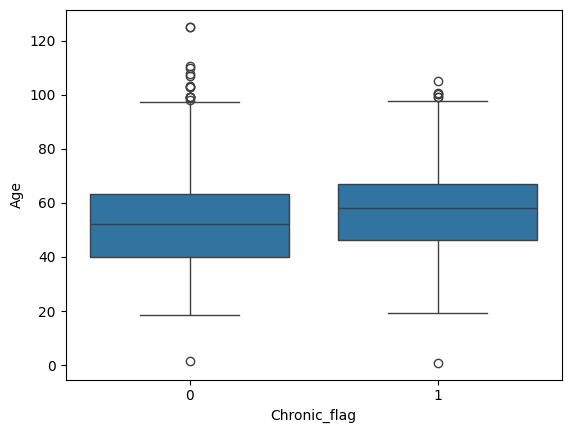

In [185]:
sns.boxplot(x='Chronic_flag', y='Age', data=data) 

<Axes: xlabel='Gender', ylabel='count'>

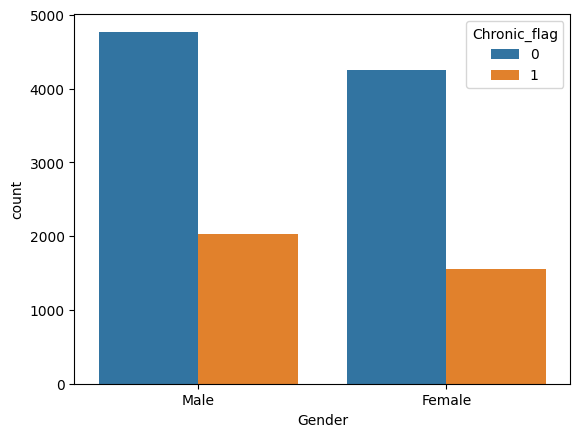

In [186]:
sns.countplot(data=data, x="Gender", hue="Chronic_flag")  

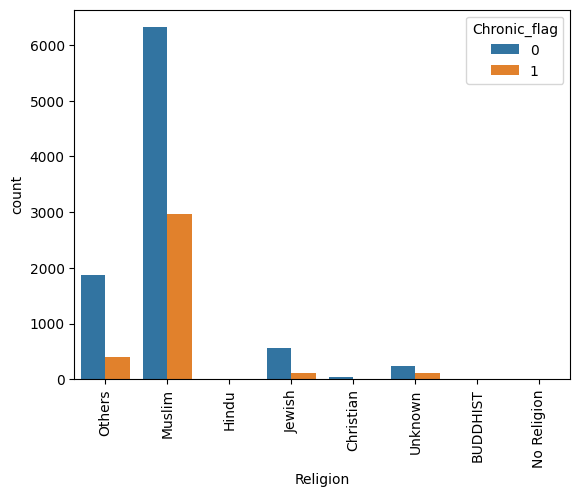

In [191]:
sns.countplot(data=data, x="Religion", hue="Chronic_flag") 
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Acute_flag', ylabel='count'>

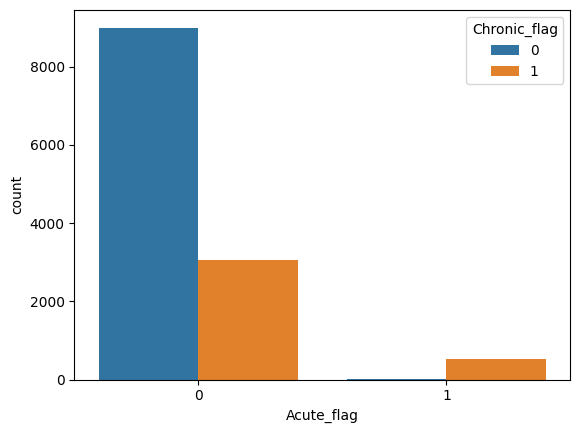

In [196]:
sns.countplot(data=data, x="Acute_flag", hue="Chronic_flag") # mostly all patients with acute flag having chroinc flg


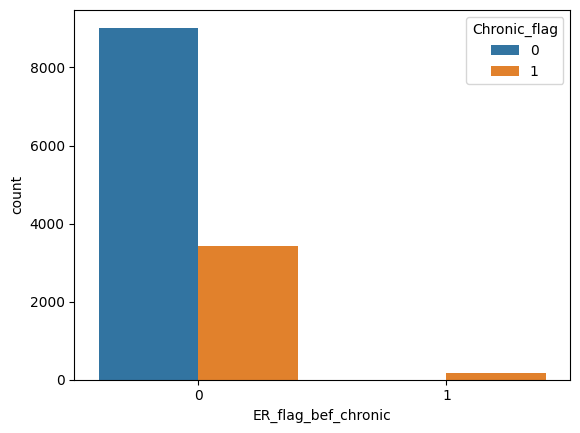

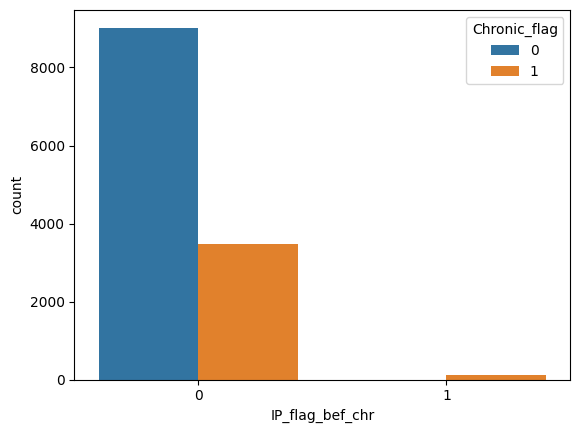

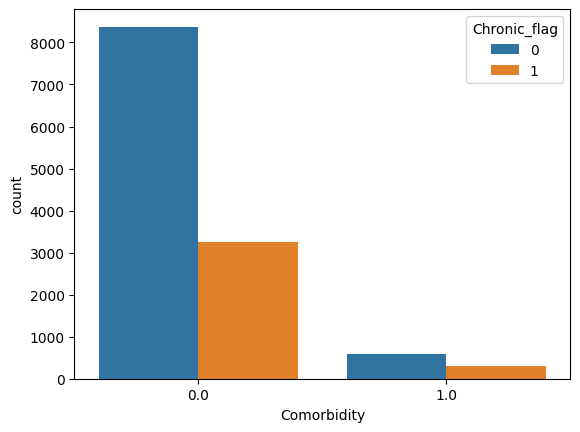

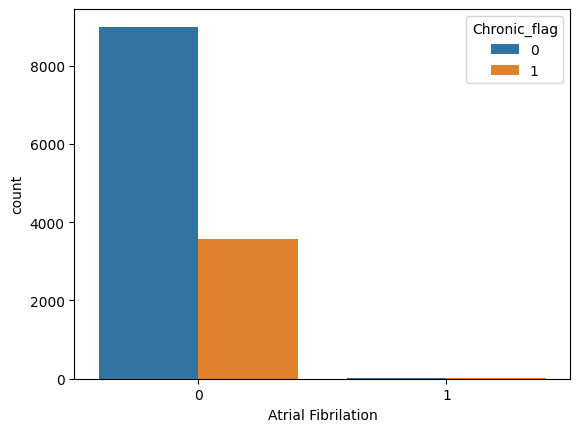

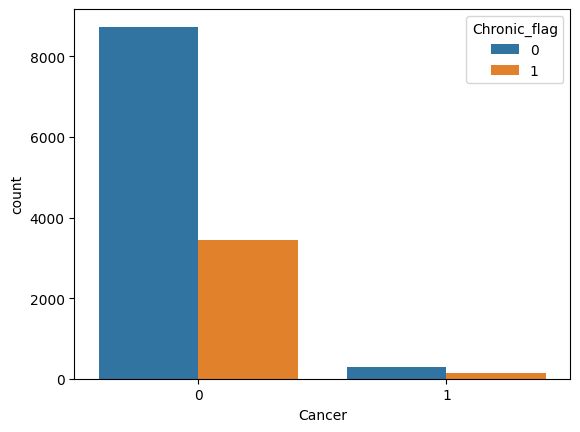

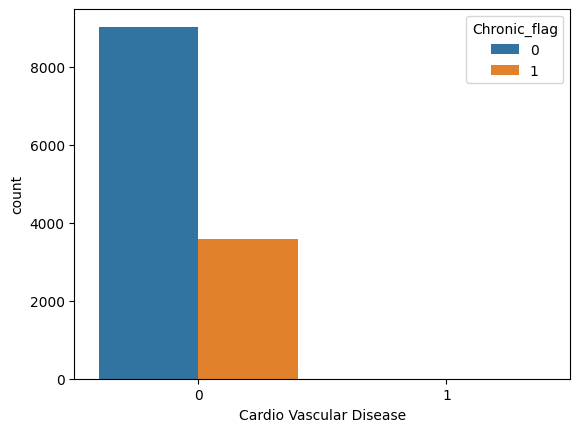

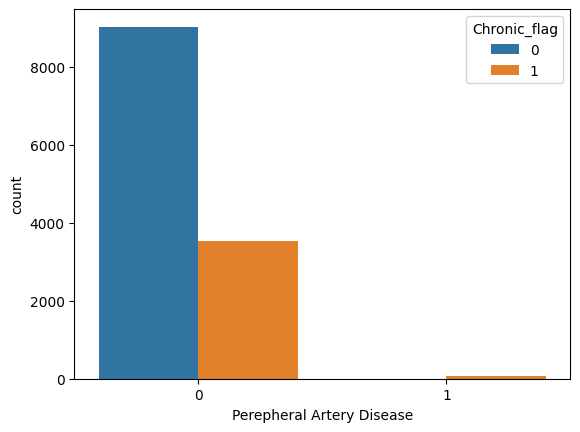

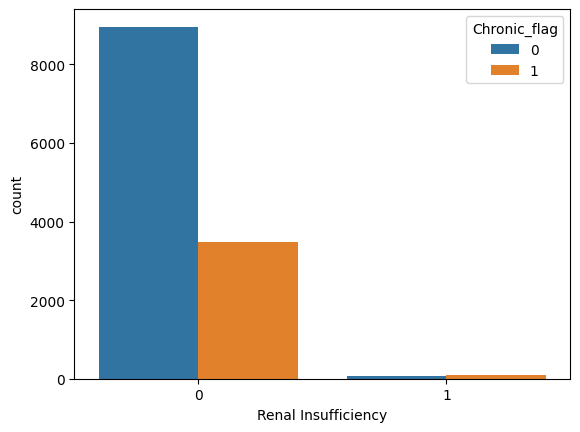

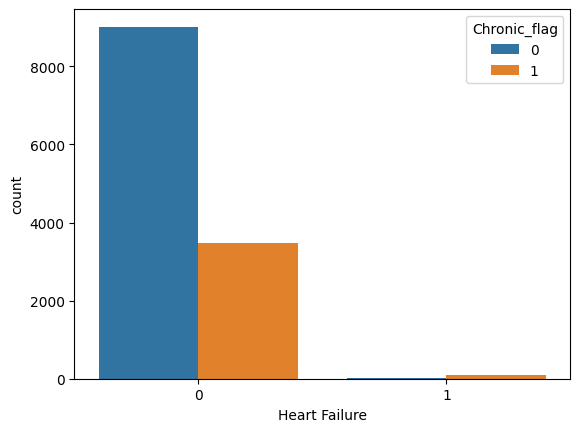

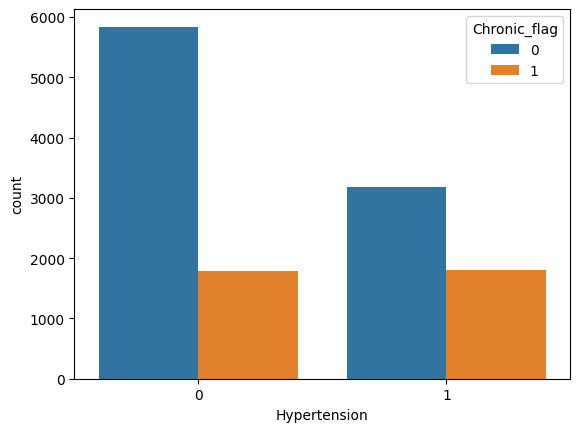

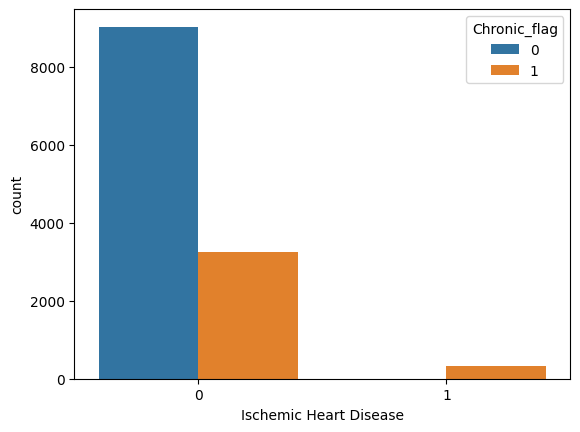

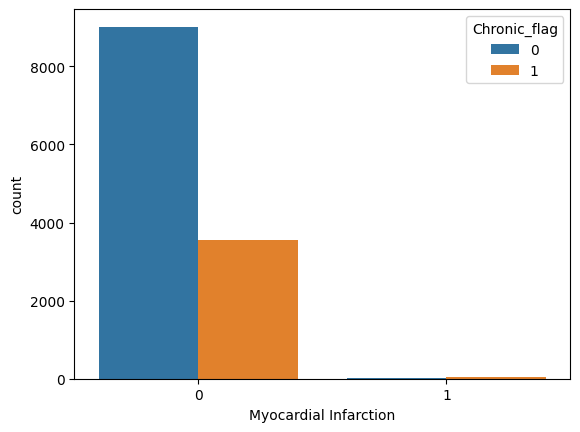

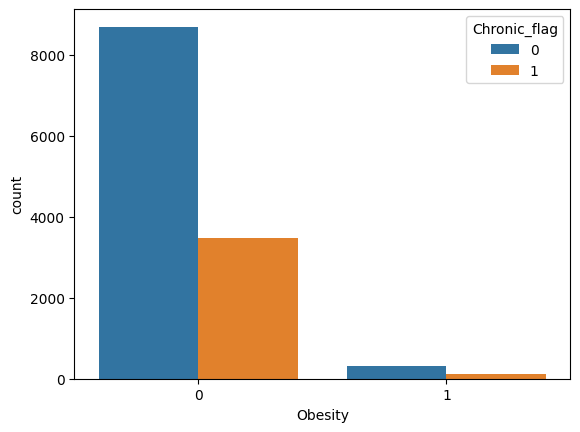

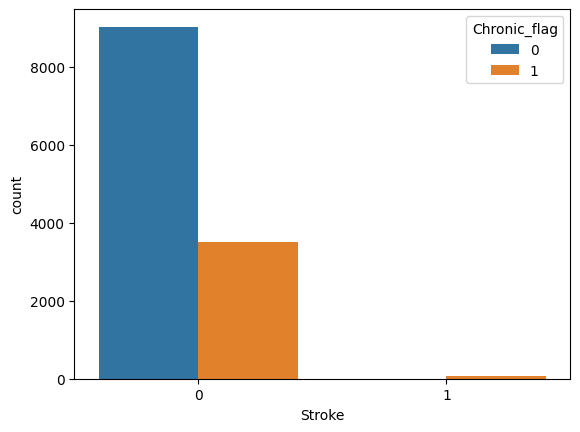

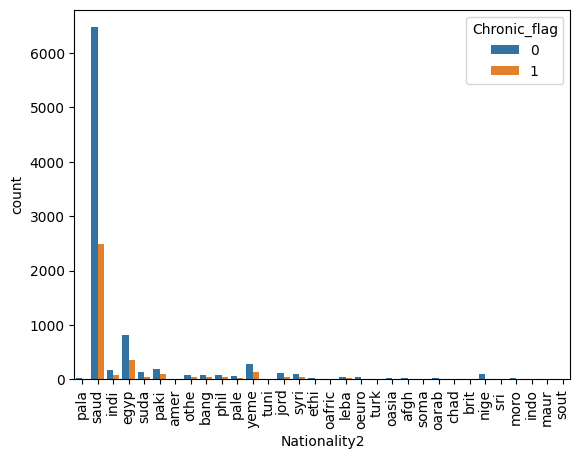

In [198]:
cat_feat = ['ER_flag_bef_chronic', 'IP_flag_bef_chr','Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Cardio Vascular Disease', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke', "Nationality2"]
for feat in cat_feat:
    sns.countplot(data=data, x=feat, hue="Chronic_flag")
    if feat == "Nationality2":
        plt.xticks(rotation=90)
    plt.show()

<Axes: xlabel='HBA1C test Compliance', ylabel='Avg_HBA1C Results'>

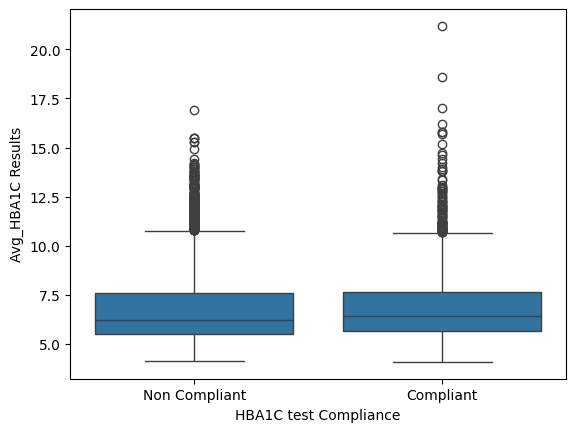

In [194]:
sns.boxplot(x='HBA1C test Compliance', y='Avg_HBA1C Results', data=data) # roughly there is a relationship

<Axes: xlabel='Chronic_flag', ylabel='# OP_Bef_chr'>

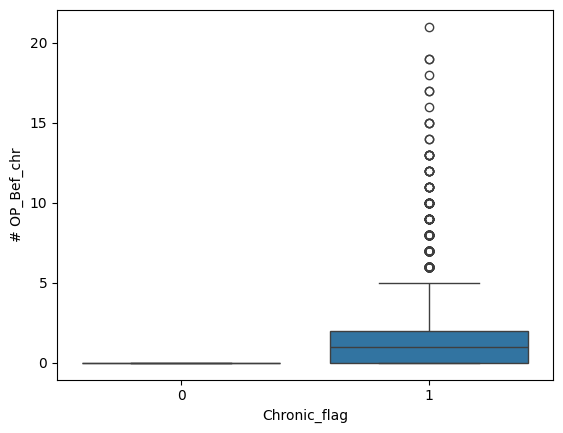

In [201]:
sns.boxplot(x='Chronic_flag', y='# OP_Bef_chr', data=data) # strong relationship

<Axes: xlabel='Chronic_flag', ylabel='# ER_befor_Chr'>

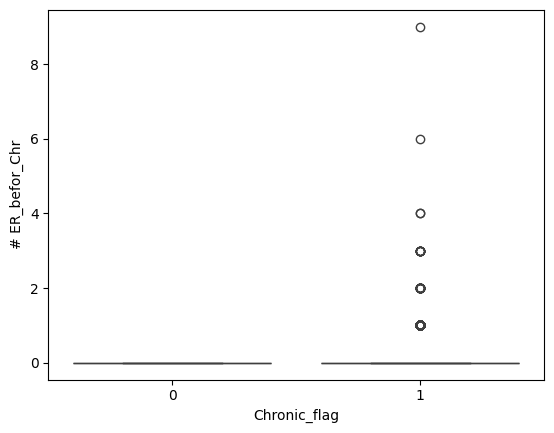

In [202]:
sns.boxplot(x='Chronic_flag', y='# ER_befor_Chr', data=data) # there is a relationship but small no > 0

<Axes: xlabel='Chronic_flag', ylabel='# IP_bef_chr'>

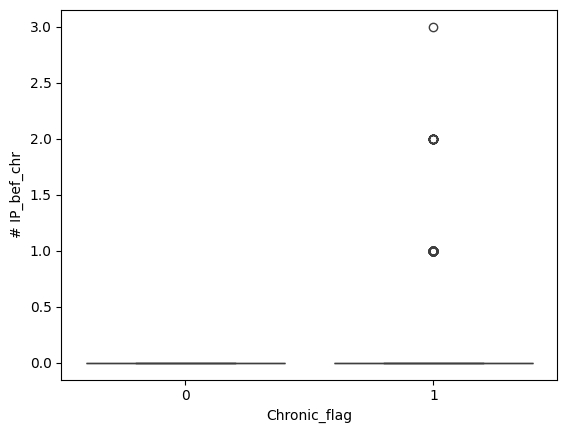

In [203]:
sns.boxplot(x='Chronic_flag', y='# IP_bef_chr', data=data) # there is a relationship but small no > 0

In [192]:
data.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic',
       '# ER_befor_Chr', 'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Cardio Vascular Disease', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality2', 'Age'],
      dtype='object')

<Axes: xlabel='HBA1C test Compliance', ylabel='Avg_HBA1C Results'>

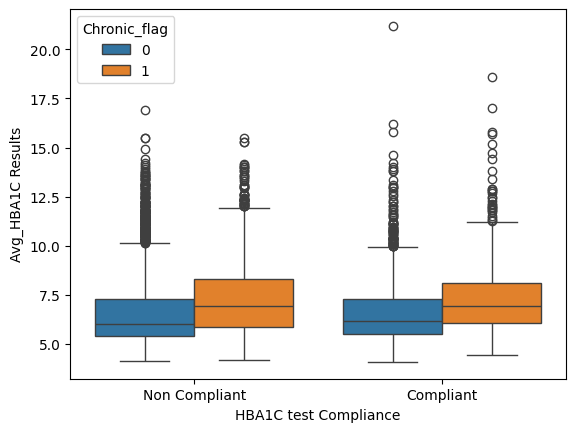

In [193]:
sns.boxplot(x='HBA1C test Compliance', y='Avg_HBA1C Results', hue='Chronic_flag', data=data) 

### 7- Model Development 

#### a- Splitting the data into train and valid

In [134]:
data2["Religion"].value_counts()

Muslim         9275
Others         2271
Jewish          668
Unknown         350
Christian        41
Hindu             3
No Religion       2
BUDDHIST          1
Name: Religion, dtype: int64

In [236]:
# splitting the data into train and valid but we saw that some feature having categories with one, two, three incidence only
# we should include this minority categories in the training data such as Religion with BUDDHIST

minor_data = data2[data2["Religion"].isin(["Hindu", "No Religion", "BUDDHIST"])]  
major_data = data2[~data2["Religion"].isin(["Hindu", "No Religion", "BUDDHIST"])]

X_train = minor_data.drop(["Chronic_flag"], axis=1)
y_train = minor_data["Chronic_flag"]
X_rest = major_data.drop(["Chronic_flag"], axis=1)
y_rest = major_data["Chronic_flag"]

# split the rest data
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_rest, y_rest, test_size=0.25, random_state=42)

# add the minor to the train data
X_train = pd.concat([X_train, X_train_rest], axis=0)
y_train = pd.concat([y_train, y_train_rest], axis=0)


In [136]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9459, 22)
(9459,)
(3152, 22)
(3152,)


In [137]:
X_train.isnull().sum()


Gender                          0
Religion                        0
Avg_HBA1C Results            2559
HBA1C test Compliance           0
Acute_flag                      0
ER_flag_bef_chronic             0
# OP_Bef_chr                    0
Comorbidity                    74
Atrial Fibrilation              0
Cancer                          0
Perepheral Artery Disease       0
Renal Insufficiency             0
Heart Failure                   0
Hypertension                    0
Ischemic Heart Disease          0
Myocardial Infarction           0
Obesity                         0
Stroke                          0
Nationality2                    7
Age                             0
ERV_before                      0
IP_before                       0
dtype: int64

In [138]:
X_test.isnull().sum()


Gender                         0
Religion                       0
Avg_HBA1C Results            852
HBA1C test Compliance          0
Acute_flag                     0
ER_flag_bef_chronic            0
# OP_Bef_chr                   0
Comorbidity                   24
Atrial Fibrilation             0
Cancer                         0
Perepheral Artery Disease      0
Renal Insufficiency            0
Heart Failure                  0
Hypertension                   0
Ischemic Heart Disease         0
Myocardial Infarction          0
Obesity                        0
Stroke                         0
Nationality2                   1
Age                            0
ERV_before                     0
IP_before                      0
dtype: int64

#### b- Replace miss values

In [139]:
# Replace nan in nationality by highest frequent value in the train data
nation_mode = X_train.Nationality2.value_counts().index[0] # saud
X_train['Nationality2'].fillna(value = nation_mode, inplace=True)
X_test['Nationality2'].fillna(value = nation_mode, inplace=True)

# Replace null in comorbidity by highest frequent value in the train data
comorb_mode = X_train.Comorbidity.value_counts().index[0] # zero
X_train['Comorbidity'].fillna(value = comorb_mode, inplace=True)
X_test['Comorbidity'].fillna(value = comorb_mode, inplace=True)

# Replace null in Avg_HBA1C Results with the median value of the training data
hba1c_med = X_train["Avg_HBA1C Results"].median() # 6.2
X_train["Avg_HBA1C Results"].fillna(value = hba1c_med, inplace=True)
X_test["Avg_HBA1C Results"].fillna(value = hba1c_med, inplace=True)


In [140]:
X_train.isnull().sum()


Gender                       0
Religion                     0
Avg_HBA1C Results            0
HBA1C test Compliance        0
Acute_flag                   0
ER_flag_bef_chronic          0
# OP_Bef_chr                 0
Comorbidity                  0
Atrial Fibrilation           0
Cancer                       0
Perepheral Artery Disease    0
Renal Insufficiency          0
Heart Failure                0
Hypertension                 0
Ischemic Heart Disease       0
Myocardial Infarction        0
Obesity                      0
Stroke                       0
Nationality2                 0
Age                          0
ERV_before                   0
IP_before                    0
dtype: int64

In [141]:
X_test.isnull().sum()


Gender                       0
Religion                     0
Avg_HBA1C Results            0
HBA1C test Compliance        0
Acute_flag                   0
ER_flag_bef_chronic          0
# OP_Bef_chr                 0
Comorbidity                  0
Atrial Fibrilation           0
Cancer                       0
Perepheral Artery Disease    0
Renal Insufficiency          0
Heart Failure                0
Hypertension                 0
Ischemic Heart Disease       0
Myocardial Infarction        0
Obesity                      0
Stroke                       0
Nationality2                 0
Age                          0
ERV_before                   0
IP_before                    0
dtype: int64

#### c- Onehotencoding for categorical features

In [142]:
cat_cols = ['Gender', 'Religion', 'HBA1C test Compliance', 'Acute_flag', 'Nationality2']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training data
X_train_encod = encoder.fit_transform(X_train[cat_cols])

# transform the valid data using the encoder fitted on the train data
X_test_encod = encoder.transform(X_test[cat_cols])

# add the onhot columns to the train and valid data
encod_col_names = encoder.get_feature_names_out(cat_cols)
X_train_encod_df = pd.DataFrame(X_train_encod, columns=encod_col_names, index=X_train.index)
X_test_encod_df = pd.DataFrame(X_test_encod, columns=encod_col_names, index=X_test.index)

#  drop the original cat features
X_train2 = pd.concat([X_train.drop(columns=cat_cols), X_train_encod_df], axis=1)
X_test2 = pd.concat([X_test.drop(columns=cat_cols), X_test_encod_df], axis=1)

X_train2.head()

,Avg_HBA1C Results,ER_flag_bef_chronic,# OP_Bef_chr,Comorbidity,Atrial Fibrilation,Cancer,Perepheral Artery Disease,Renal Insufficiency,Heart Failure,Hypertension,...,Nationality2_phil,Nationality2_saud,Nationality2_soma,Nationality2_sout,Nationality2_sri,Nationality2_suda,Nationality2_syri,Nationality2_tuni,Nationality2_turk,Nationality2_yeme
Unique_Identifier,,,,,,,,,,,,,,,,,,,,,
SGH1101426,7.500000,0,0,0.0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH1102255,6.851652,0,1,0.0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH1104725,6.349803,0,0,0.0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH11010503,5.299434,0,0,1.0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH11011057,5.100000,0,0,0.0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### d- Tain, test and evaluate the model

#### First try logistic and Randomforest

In [143]:
LR = LogisticRegression(max_iter=10000, solver='liblinear')
LR.fit (X_train2, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [144]:
print("Train acc", accuracy_score(y_train, LR.predict(X_train2)))
print("Test acc", accuracy_score(y_test, LR.predict(X_test2)))
print("Train F1", f1_score(y_train, LR.predict(X_train2)))
print("Test F1", f1_score(y_test, LR.predict(X_test2)))

Train acc 0.8973464425414949
Test acc 0.9029187817258884
Train F1 0.7862645828747524
Test F1 0.78328611898017


In [145]:
RF = RandomForestClassifier()
RF.fit (X_train2, y_train)
print("Train acc", accuracy_score(y_train, RF.predict(X_train2)))
print("Test acc", accuracy_score(y_test, RF.predict(X_test2)))
print("Train F1", f1_score(y_train, RF.predict(X_train2)))
print("Test F1", f1_score(y_test, RF.predict(X_test2)))

Train acc 0.9940797124431758
Test acc 0.8813451776649747
Train F1 0.9896755162241888
Test F1 0.7539473684210525


#### Feature importance using the randomforest model

In [146]:
importances = RF.feature_importances_
import_feat = pd.DataFrame(importances, index=X_train2.columns, columns=["importance"]).sort_values(by="importance", ascending=False)
import_feat20 = import_feat[:21]
import_feat20

,importance
# OP_Bef_chr,0.355708
Age,0.220010
Avg_HBA1C Results,0.157037
Ischemic Heart Disease,0.044193
Acute_flag_0,0.041873
Acute_flag_1,0.036454
ER_flag_bef_chronic,0.011974
Hypertension,0.011942
ERV_before,0.010747
Heart Failure,0.008534


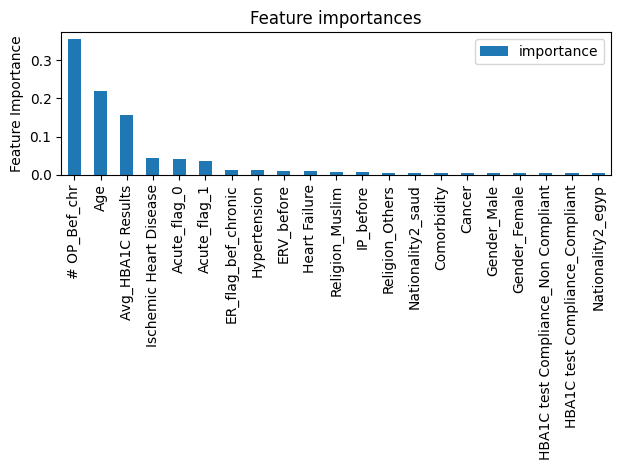

In [147]:
fig, ax = plt.subplots()
import_feat20.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Feature Importance")
fig.tight_layout()

#### Trying different models in deafault parameters

RandomForestClassifier 

accuracy 0.88
f1 score 0.75
ROC AUC 0.81
PR AUC 0.66
              precision    recall  f1-score   support

          No       0.89      0.96      0.92      2300
         Yes       0.85      0.67      0.75       852

    accuracy                           0.88      3152
   macro avg       0.87      0.81      0.84      3152
weighted avg       0.88      0.88      0.87      3152



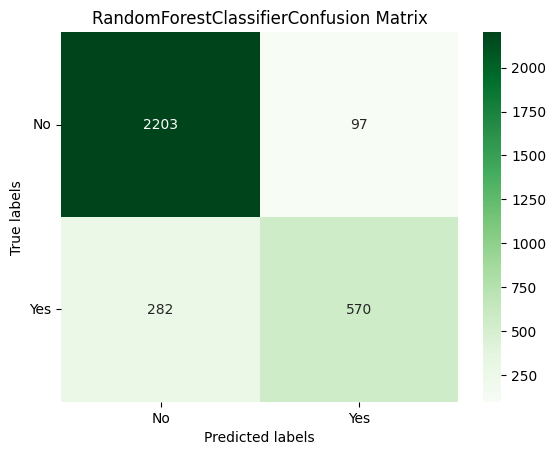

LogisticRegression 

accuracy 0.9
f1 score 0.78
ROC AUC 0.82
PR AUC 0.73
              precision    recall  f1-score   support

          No       0.88      1.00      0.94      2300
         Yes       0.99      0.64      0.78       852

    accuracy                           0.90      3152
   macro avg       0.93      0.82      0.86      3152
weighted avg       0.91      0.90      0.89      3152



C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


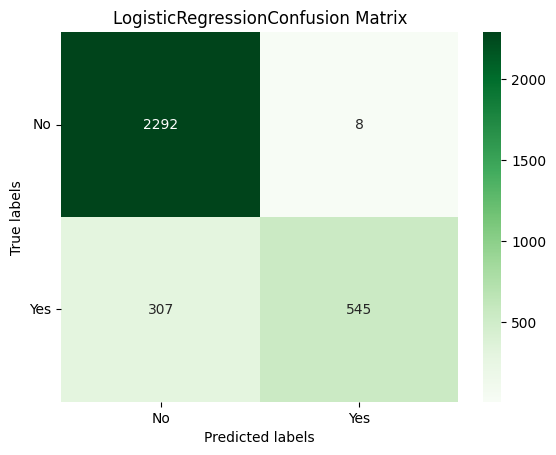

KNeighborsClassifier 

accuracy 0.82
f1 score 0.55
ROC AUC 0.69
PR AUC 0.5
              precision    recall  f1-score   support

          No       0.82      0.97      0.89      2300
         Yes       0.82      0.41      0.55       852

    accuracy                           0.82      3152
   macro avg       0.82      0.69      0.72      3152
weighted avg       0.82      0.82      0.79      3152



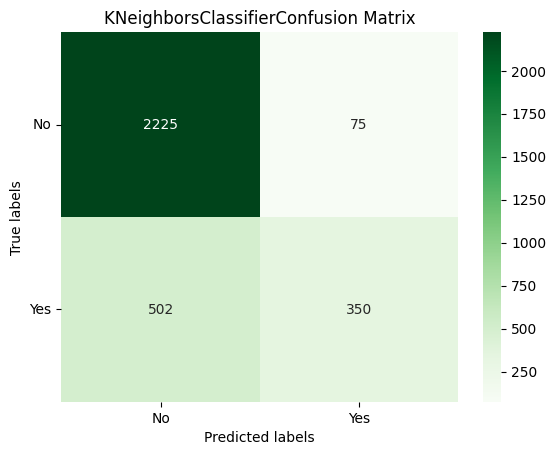

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2736, number of negative: 6723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 9459, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289248 -> initscore=-0.899037
[LightGBM] [Info] Start training from score -0.899037
LGBMClassifier 

accuracy 0.9
f1 score 0.78
ROC AUC 0.82
PR AUC 0.73
              precision    recall  f1-score   support

          No       0.89      0.99      0.94      2300
         Yes       0.97      0.65      0.78       852

    accuracy                           0.90      3152
   macro avg       0.93      0.82      0.86      3152
weighted avg       0.91  

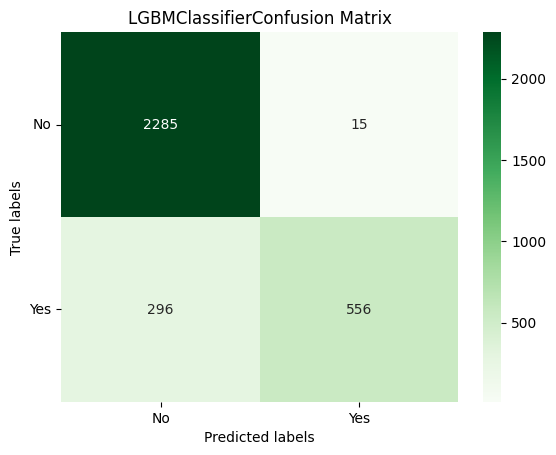

SVC 

accuracy 0.82
f1 score 0.48
ROC AUC 0.66
PR AUC 0.5
              precision    recall  f1-score   support

          No       0.80      1.00      0.89      2300
         Yes       1.00      0.32      0.48       852

    accuracy                           0.82      3152
   macro avg       0.90      0.66      0.69      3152
weighted avg       0.85      0.82      0.78      3152



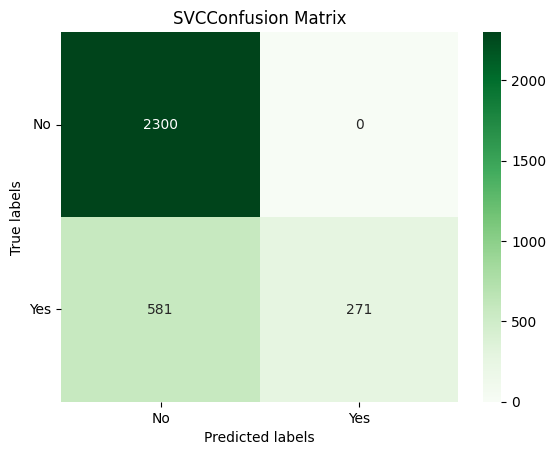

XGBClassifier 

accuracy 0.9
f1 score 0.78
ROC AUC 0.82
PR AUC 0.72
              precision    recall  f1-score   support

          No       0.88      0.99      0.93      2300
         Yes       0.96      0.65      0.78       852

    accuracy                           0.90      3152
   macro avg       0.92      0.82      0.86      3152
weighted avg       0.91      0.90      0.89      3152



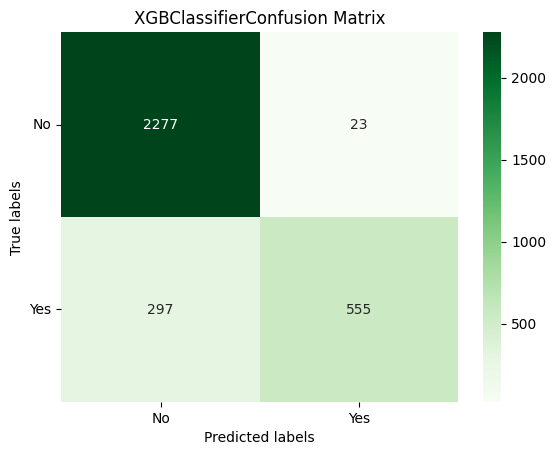

In [209]:
labels = ['No', 'Yes']

# Four model variables with middle parameters as possible
clf2 = RandomForestClassifier()
clf3 = LogisticRegression()
clf4 = KNeighborsClassifier()
clf5 = lgb.LGBMClassifier()
clf6 = SVC()
clf7 = xgb.XGBClassifier()

models =[clf2, clf3, clf4, clf5, clf6, clf7]


# use of 5 quality metrics to be used in k fold cross validation
scoring = {'acc' : make_scorer(accuracy_score),
           'f1' : make_scorer(f1_score), 
           'roc_auc' : make_scorer(roc_auc_score),
           'PR_auc' : make_scorer(average_precision_score),
           'matcf': make_scorer(matthews_corrcoef)}

# loop through the three models and fit all X, y and evaluate the model using 5 kfold cross validation
# and store each type of score range in a list then store total scores for each model in a dictionary
score = []
for clf in models:
    # Fine-tune the hyperparameters
    clf.fit(X_train2, y_train)

    # Make predictions using the optimised parameters
    clf_pred = clf.predict(X_test2)

    print(clf.__class__.__name__, "\n")
    print("accuracy", round(accuracy_score(y_test, clf_pred), 2))
    print("f1 score", round(f1_score(y_test, clf_pred), 2))
    print("ROC AUC", round(roc_auc_score(y_test, clf_pred), 2))
    print("PR AUC", round(average_precision_score(y_test, clf_pred), 2))
    print(classification_report(y_test, clf_pred, target_names=labels))
    
    score.append(round(average_precision_score(y_test, clf_pred), 2))
    cm = confusion_matrix(y_test, clf_pred)

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Greens') 

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    ax.set_title(str(clf.__class__.__name__) + 'Confusion Matrix') 
    ax.xaxis.set_ticklabels(labels) 
    ax.yaxis.set_ticklabels(labels, rotation=360);
    plt.show()

#### We will choose Randomforest because it classify the patients with chronic incidence (class 1) roughly high recall more than the others

#### Hyperparameter tuning

In [472]:
from sklearn.model_selection import RandomizedSearchCV

grid_param = {'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'criterion' :['gini', 'entropy'],
 'n_estimators': [100, 200, 400, 600]}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
RF = RandomForestClassifier()
scoring = make_scorer(f1_score)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = grid_param, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train2, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 400, 600]},
                   random_state=42, verbose=2)

In [475]:
# randomsearch parameter
rf_param = pd.DataFrame(rf_random.cv_results_).sort_values(by="mean_test_score", ascending=False)
rf_param.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
73,1.691093,0.027701,0.126222,0.004142,100,2,4,40,gini,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.893752,0.895655,0.903584,0.897664,0.004258,1
72,1.705750,0.034064,0.137521,0.027038,100,10,4,20,gini,"{'n_estimators': 100, 'min_samples_split': 10,...",0.894069,0.895338,0.903267,0.897558,0.004070,2
89,11.321179,0.022328,0.818111,0.007257,600,5,4,None,gini,"{'n_estimators': 600, 'min_samples_split': 5, ...",0.893752,0.895338,0.903584,0.897558,0.004310,2
28,7.947795,0.124594,0.503943,0.011107,400,10,4,None,entropy,"{'n_estimators': 400, 'min_samples_split': 10,...",0.893752,0.895338,0.903584,0.897558,0.004310,2
66,1.818492,0.054307,0.137432,0.004621,100,10,4,40,gini,"{'n_estimators': 100, 'min_samples_split': 10,...",0.893752,0.895338,0.903584,0.897558,0.004310,2


In [476]:
# best parameters
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 40,
 'criterion': 'gini'}

accuracy 0.9
f1 score 0.78
ROC AUC 0.82
PR AUC 0.74
              precision    recall  f1-score   support

          No       0.88      1.00      0.94      2300
         Yes       0.99      0.65      0.78       852

    accuracy                           0.90      3152
   macro avg       0.94      0.82      0.86      3152
weighted avg       0.91      0.90      0.90      3152



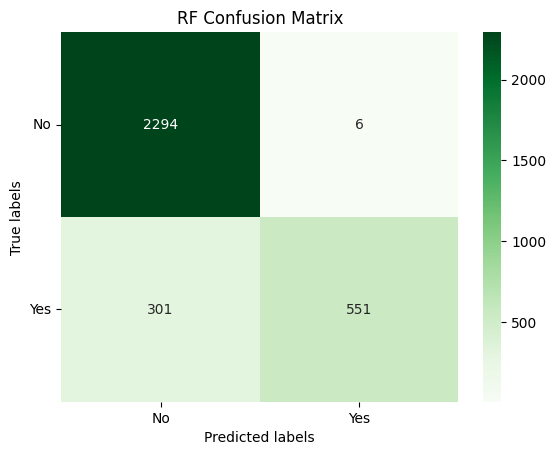

In [505]:
# Random Forest model with best parameter
RF = RandomForestClassifier(n_estimators =100, min_samples_split=2,
 min_samples_leaf =4,
 max_depth= 40,
 criterion= 'gini')

RF.fit(X_train2, y_train)

print("accuracy", round(accuracy_score(y_test, RF.predict(X_test2)), 2))
print("f1 score", round(f1_score(y_test, RF.predict(X_test2)), 2))
print("ROC AUC", round(roc_auc_score(y_test, RF.predict(X_test2)), 2))
print("PR AUC", round(average_precision_score(y_test, RF.predict(X_test2)), 2))

print(classification_report(y_test, RF.predict(X_test2), target_names=labels))

score.append(round(average_precision_score(y_test, RF.predict(X_test2)), 2))
cm = confusion_matrix(y_test, RF.predict(X_test2))

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title("RF Confusion Matrix")
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);
plt.show()

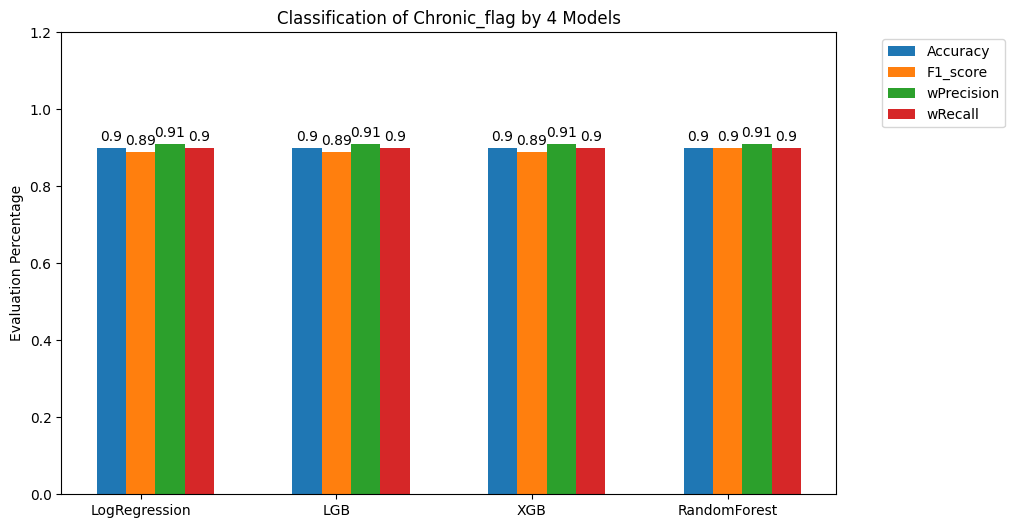

In [228]:
models = ["LogRegression", "LGB", "XGB", "RandomForest"]
scores = {
    "Accuracy": [0.90, 0.90, 0.90, 0.90],
    "F1_score": [0.89, 0.89, 0.89, 0.90],
    "wPrecision": [0.91, 0.91, 0.91, 0.91],
    "wRecall": [0.90, 0.90, 0.90, 0.90]
}

x = np.arange(len(models))  # Label locations
width = 0.15  # Adjusted bar width for better spacing
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

for meta, score in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset - width, score, width, label=meta)  # Shift bars slightly for separation
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Labels and title
ax.set_ylabel("Evaluation Percentage")
ax.set_title("Classification of Chronic_flag by 4 Models")
ax.set_xticks(x)
ax.set_xticklabels(models)  # Properly align labels
ax.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")  # Move legend outside
ax.set_ylim(0, 1.2)  # Set y-axis limit

plt.show()

#### e- Train the model on all data before saving it to be used for inference

In [237]:
data2.columns

Index(['Gender', 'Religion', 'Avg_HBA1C Results', 'HBA1C test Compliance',
       'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure',
       'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction',
       'Obesity', 'Stroke', 'Nationality2', 'Age', 'ERV_before', 'IP_before'],
      dtype='object')

In [151]:
data2.isnull().sum()

Gender                          0
Religion                        0
Avg_HBA1C Results            3411
HBA1C test Compliance           0
Chronic_flag                    0
Acute_flag                      0
ER_flag_bef_chronic             0
# OP_Bef_chr                    0
Comorbidity                    98
Atrial Fibrilation              0
Cancer                          0
Perepheral Artery Disease       0
Renal Insufficiency             0
Heart Failure                   0
Hypertension                    0
Ischemic Heart Disease          0
Myocardial Infarction           0
Obesity                         0
Stroke                          0
Nationality2                    8
Age                             0
ERV_before                      0
IP_before                       0
dtype: int64

In [238]:
# Replace nan in nationality by highest frequent value in the train data
nation_mode = data2.Nationality2.value_counts().index[0] # saud
data2['Nationality2'].fillna(value = nation_mode, inplace=True)
data2['Nationality2'].fillna(value = nation_mode, inplace=True)

# Replace null in comorbidity by highest frequent value in the train data
comorb_mode = data2.Comorbidity.value_counts().index[0] # zero
data2['Comorbidity'].fillna(value = comorb_mode, inplace=True)
data2['Comorbidity'].fillna(value = comorb_mode, inplace=True)

# Replace null in Avg_HBA1C Results with the median value of the training data
hba1c_med = data2["Avg_HBA1C Results"].median() # 6.2
data2["Avg_HBA1C Results"].fillna(value = hba1c_med, inplace=True)
data2["Avg_HBA1C Results"].fillna(value = hba1c_med, inplace=True)

In [239]:
data2.columns

Index(['Gender', 'Religion', 'Avg_HBA1C Results', 'HBA1C test Compliance',
       'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure',
       'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction',
       'Obesity', 'Stroke', 'Nationality2', 'Age', 'ERV_before', 'IP_before'],
      dtype='object')

In [240]:
cat_cols = ['Gender', 'Religion', 'HBA1C test Compliance', 'Acute_flag', 'Nationality2']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training data
data_encod = encoder.fit_transform(data2[cat_cols])

# add the onhot columns to the train and test data
encod_col_names = encoder.get_feature_names_out(cat_cols)
data_encod_df = pd.DataFrame(data_encod, columns=encod_col_names, index=data2.index)

#  drop the original cat features
data2 = pd.concat([data2.drop(columns=cat_cols), data_encod_df], axis=1)

data2.head()

,Avg_HBA1C Results,Chronic_flag,ER_flag_bef_chronic,# OP_Bef_chr,Comorbidity,Atrial Fibrilation,Cancer,Perepheral Artery Disease,Renal Insufficiency,Heart Failure,...,Nationality2_phil,Nationality2_saud,Nationality2_soma,Nationality2_sout,Nationality2_sri,Nationality2_suda,Nationality2_syri,Nationality2_tuni,Nationality2_turk,Nationality2_yeme
Unique_Identifier,,,,,,,,,,,,,,,,,,,,,
SGH11015,5.438750,0,0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH11016,6.186032,0,0,0,0.0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH11017,6.099180,0,0,0,0.0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH11018,8.804544,0,0,0,0.0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH11019,8.232722,0,0,0,0.0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


accuracy 0.9
f1 score 0.8
ROC AUC 0.83
PR AUC 0.75
              precision    recall  f1-score   support

          No       0.88      1.00      0.94      9023
         Yes       0.98      0.67      0.80      3588

    accuracy                           0.90     12611
   macro avg       0.93      0.83      0.87     12611
weighted avg       0.91      0.90      0.90     12611



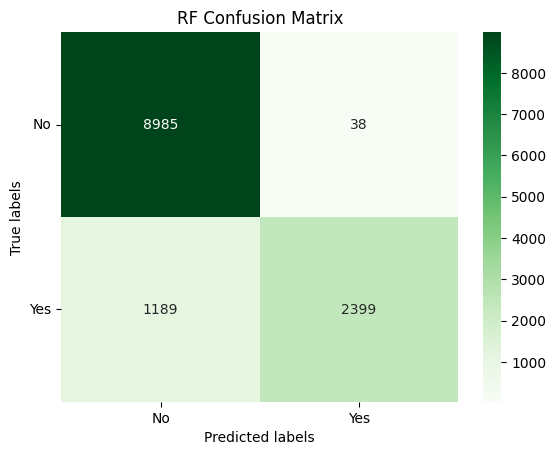

In [241]:
X = data2.drop("Chronic_flag", axis=1)
y = data2["Chronic_flag"]

# Random Forest model with best parameter
RF = RandomForestClassifier(n_estimators =100, min_samples_split=2,
 min_samples_leaf =4,
 max_depth= 40,
 criterion= 'gini', class_weight="balanced")

RF.fit(X, y)

print("accuracy", round(accuracy_score(y, RF.predict(X)), 2))
print("f1 score", round(f1_score(y, RF.predict(X)), 2))
print("ROC AUC", round(roc_auc_score(y, RF.predict(X)), 2))
print("PR AUC", round(average_precision_score(y, RF.predict(X)), 2))

print(classification_report(y, RF.predict(X), target_names=labels))

score.append(round(average_precision_score(y, RF.predict(X)), 2))
cm = confusion_matrix(y, RF.predict(X))

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title("RF Confusion Matrix")
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);
plt.show()

In [229]:
###

#### See the feature importance according to the final trained model 

In [242]:
importances = RF.feature_importances_
import_feat = pd.DataFrame(importances, index=X.columns, columns=["importance"]).sort_values(by="importance", ascending=False)
import_feat20 = import_feat[:21]
import_feat20

,importance
# OP_Bef_chr,0.514011
Avg_HBA1C Results,0.078960
Acute_flag_1,0.072529
Age,0.061697
Ischemic Heart Disease,0.059454
Acute_flag_0,0.054928
Religion_Muslim,0.021405
Religion_Others,0.015787
ER_flag_bef_chronic,0.014795
ERV_before,0.014758


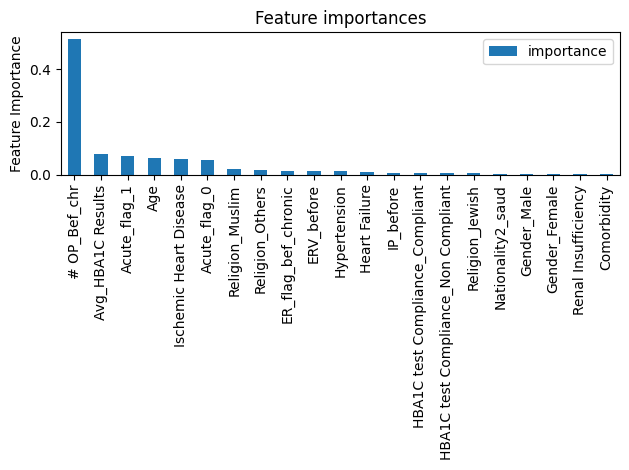

In [243]:
fig, ax = plt.subplots()
import_feat20.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Feature Importance")
fig.tight_layout()

### 8- Inference on test data (unseen data)

In [244]:
# Save the model for inference
import joblib
joblib.dump(RF, 'RF_final_model.pkl')

# Load the model
RF_model = joblib.load('RF_final_model.pkl')


In [245]:
# read the test dataset from predict sheet
test = pd.read_excel("Data_DM.xlsx", sheet_name='Predict')
test.head()

,Unique_Identifier,Gender,Religion,Nationality,Avg_HBA1C Results,HBA1C test Compliance,D_Of_Birth,Diagnosis_Type,Acute_flag,ER_flag_bef_chronic,...,Cancer,Cardio Vascular Disease,Perepheral Artery Disease,Renal Insufficiency,Heart Failure,Hypertension,Ischemic Heart Disease,Myocardial Infarction,Obesity,Stroke
0,SGH22015,Female,OTHER,Saudi,Haven't performed Before,Non Compliant,1970-01-01,Type II,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SGH22016,Male,OTHER,Saudi,5.817996,Non Compliant,1975-01-01,Type II,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SGH22017,Female,OTHER,Saudi,9.792921,Non Compliant,1977-01-01,Type II,0,0,...,0,0,0,0,0,1,0,0,0,0
3,SGH22018,Male,OTHER,Saudi,Haven't performed Before,Non Compliant,1957-01-01,Type II,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SGH22019,Male,OTHER,Saudi,7.1,Non Compliant,1961-11-03,Type II,0,0,...,0,0,0,0,0,0,0,0,0,0


#### a- Prepare the test data for the model
#### we will use the same steps used in training for handling the features

In [246]:
test.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Acute_flag', 'ER_flag_bef_chronic', '# ER_befor_Chr',
       'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr', 'Comorbidity',
       'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease',
       'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure',
       'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction',
       'Obesity', 'Stroke'],
      dtype='object')

In [247]:
# Religion
# Replace some values in the Religion columns to be unified
test["Religion"].replace(["ISLAM", "MUSLIM", "Islam"], "Muslim", inplace=True)
test["Religion"].replace(["Catholic", "CHRISTIAN", "United Church of Christ in Phi", "Uniting Church", "Orthodox", "Methodist", "Greek Orthodox", "Jehovas Witness"], "Christian", inplace=True)
test["Religion"].replace(["HINDU"], "Hindu", inplace=True)
test["Religion"].replace(["OTHER"], "Others", inplace=True)
test["Religion"].replace(["Not Specified", "Unknown/Not Known"], "Unknown", inplace=True)
test["Religion"].replace(["JEWISH"], "Jewish", inplace=True)

test["Religion"].value_counts()

Muslim       4329
Others        326
Unknown       187
Jewish        172
Christian       6
Hindu           1
BUDDHIST        1
Name: Religion, dtype: int64

In [248]:
# Nationality we will replace its values with the train values using mapping

test["Nationality"].value_counts()

Saudi             2691
SAUDI              866
Egyptian           280
EGYPTIAN           129
Yemeni              87
                  ... 
ERITREAN             1
COMORIAN             1
AMERICAN SAMOA       1
Kuwaiti              1
SOUTH KOREAN         1
Name: Nationality, Length: 130, dtype: int64

In [249]:
test["Nationality2"] = test["Nationality"].map(nation_dict)
test["Nationality2"].value_counts()

saud      3558
egyp       409
yeme       181
paki       110
indi       102
suda        86
jord        72
syri        71
phil        49
othe        43
pale        40
bang        38
nige        34
leba        23
oasia       19
ethi        16
moro        14
sri         11
tuni        10
oeuro       10
soma         9
brit         9
afgh         9
amer         7
indo         7
oafric       6
turk         5
chad         5
oarab        4
pala         2
maur         2
sout         1
Name: Nationality2, dtype: int64

In [250]:
test["Avg_HBA1C Results"].value_counts()

Haven't performed Before    1723
5.5                           80
5.3                           73
5.7                           73
5.4                           71
                            ... 
6.47996913572896               1
6.71495346223635               1
7.31                           1
7.15807236621703               1
12.0735247546025               1
Name: Avg_HBA1C Results, Length: 1401, dtype: int64

In [251]:
# replace Haven't performed Before with median of train column as calculated above
test["Avg_HBA1C Results"].replace("Haven't performed Before", hba1c_med, inplace=True)
test["Avg_HBA1C Results"].value_counts()

6.296745     1723
5.500000       80
5.300000       73
5.700000       73
5.400000       71
             ... 
6.479969        1
6.714953        1
7.310000        1
7.158072        1
12.073525       1
Name: Avg_HBA1C Results, Length: 1401, dtype: int64

In [252]:
today = today = pd.Timestamp.today()
test["Age"] = test['D_Of_Birth'].apply(lambda x: round((today - x).days / 365.25, 2))  # Divide by 365.25 to account for leap years
test["Age"].value_counts()

65.13    67
68.04    55
66.10    51
64.16    49
69.01    49
         ..
66.53     1
60.55     1
49.58     1
52.67     1
50.68     1
Name: Age, Length: 2498, dtype: int64

In [253]:
print(test["Age"].max(), test['Age'].min())

125.12 18.72


In [254]:
# add the new feature combination as done in the training
test["ERV_before"] = test["ER_flag_bef_chronic"]*test["# ER_befor_Chr"]
test["IP_before"] = test["IP_flag_bef_chr"]*test["# IP_bef_chr"]
test["ERV_before"].value_counts()

0    4962
1      44
2      13
4       2
3       1
Name: ERV_before, dtype: int64

In [169]:
test["IP_before"].value_counts()

0    4946
1      70
3       3
2       3
Name: IP_before, dtype: int64

In [170]:
test["Comorbidity"].value_counts()

0    4570
1     408
2      33
3      10
5       1
Name: Comorbidity, dtype: int64

In [255]:
# replace values >1 with the mode calculated from the train data whic was zero
test["Comorbidity"].replace([2, 3, 5], 0, inplace=True)
test["Comorbidity"].value_counts()

0    4614
1     408
Name: Comorbidity, dtype: int64

In [256]:
test.columns

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Acute_flag', 'ER_flag_bef_chronic', '# ER_befor_Chr',
       'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr', 'Comorbidity',
       'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease',
       'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure',
       'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction',
       'Obesity', 'Stroke', 'Nationality2', 'Age', 'ERV_before', 'IP_before'],
      dtype='object')

#### b- drop extra features or redundant such as training

In [257]:
test.drop(["Diagnosis_Type", 'Cardio Vascular Disease', 'Nationality', 'D_Of_Birth', '# ER_befor_Chr', 'IP_flag_bef_chr',
       '# IP_bef_chr'], axis=1, inplace=True)
# Use unique identifier as the index 
test.set_index("Unique_Identifier", inplace=True)
test.head()

,Gender,Religion,Avg_HBA1C Results,HBA1C test Compliance,Acute_flag,ER_flag_bef_chronic,# OP_Bef_chr,Comorbidity,Atrial Fibrilation,Cancer,...,Heart Failure,Hypertension,Ischemic Heart Disease,Myocardial Infarction,Obesity,Stroke,Nationality2,Age,ERV_before,IP_before
Unique_Identifier,,,,,,,,,,,,,,,,,,,,,
SGH22015,Female,Others,6.296745,Non Compliant,0,0,0,0,0,0,...,0,0,0,0,0,0,saud,55.13,0,0
SGH22016,Male,Others,5.817996,Non Compliant,0,0,0,0,0,0,...,0,0,0,0,0,0,saud,50.13,0,0
SGH22017,Female,Others,9.792921,Non Compliant,0,0,0,0,0,0,...,0,1,0,0,0,0,saud,48.13,0,0
SGH22018,Male,Others,6.296745,Non Compliant,0,0,0,0,0,0,...,0,0,0,0,0,0,saud,68.13,0,0
SGH22019,Male,Others,7.100000,Non Compliant,0,0,0,0,0,0,...,0,0,0,0,0,0,saud,63.29,0,0


#### c- Onhotencoding

In [258]:
# transform the test data using the encoder fitted on the train data
X_test_encod = encoder.transform(test[cat_cols])

# add the onhot columns to the train and test data
test_encod_df = pd.DataFrame(X_test_encod, columns=encod_col_names, index=test.index)

#  drop the original cat features
test = pd.concat([test.drop(columns=cat_cols), test_encod_df], axis=1)

test.head()

,Avg_HBA1C Results,ER_flag_bef_chronic,# OP_Bef_chr,Comorbidity,Atrial Fibrilation,Cancer,Perepheral Artery Disease,Renal Insufficiency,Heart Failure,Hypertension,...,Nationality2_phil,Nationality2_saud,Nationality2_soma,Nationality2_sout,Nationality2_sri,Nationality2_suda,Nationality2_syri,Nationality2_tuni,Nationality2_turk,Nationality2_yeme
Unique_Identifier,,,,,,,,,,,,,,,,,,,,,
SGH22015,6.296745,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH22016,5.817996,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH22017,9.792921,0,0,0,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH22018,6.296745,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGH22019,7.100000,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
sum(X.columns == test.columns) # ensure that all columns are equal in train and test data with the same order

63

#### d- Prediction

In [260]:
# Use the trained model to predicted the chroinc_flag on the test data
test["Predicted_Chronic_flag"] = RF_model.predict(test)
test["Predicted_Chronic_flag"].value_counts()

0    4241
1     781
Name: Predicted_Chronic_flag, dtype: int64

In [261]:
# rename the column to be Chroinc_flag instead of predicted
test.rename({"Predicted_Chronic_flag": "Chronic_flag"}, axis=1, inplace=True)

In [262]:
predictions = pd.DataFrame(test["Chronic_flag"], columns=["Chronic_flag"])
predictions

,Chronic_flag
Unique_Identifier,
SGH22015,0
SGH22016,0
SGH22017,0
SGH22018,0
SGH22019,0
...,...
SGH2205032,0
SGH2205033,0
SGH2205034,0


In [263]:
test["Chronic_flag"].value_counts()

0    4241
1     781
Name: Chronic_flag, dtype: int64

In [265]:
# save the prediction in a separate file as csv
predictions.to_csv('Predicted_Chronic_flag.csv', index=True) 